<h1 align="center">Representational learning with Python</h1><br />
Representational learning is one of the main working-horses in a data scientist's daily routine.
In a nutshell, representational learning serves the purpose of identifing an information preserving low-rank representation of the data - to reduce the dimensionality of a dataset with minimal loss of information. <img src="Projections.png" width="600">



To get you up and running, first import some required modules and set the plot environment:

In [10]:
import pandas as pd
import numpy as np
import sklearn.decomposition as repres
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Now, grab some data: Load the pickle object 'MNIST_small.pkl' as pandas dataframe:

In [40]:
# read the pickle object 
df = pd.read_pickle('../MNIST_4000.pkl')
# get the name of all column 
feat_cols = df.columns[:784].values
df.shape


(4000, 785)

Let's take a look at the data:

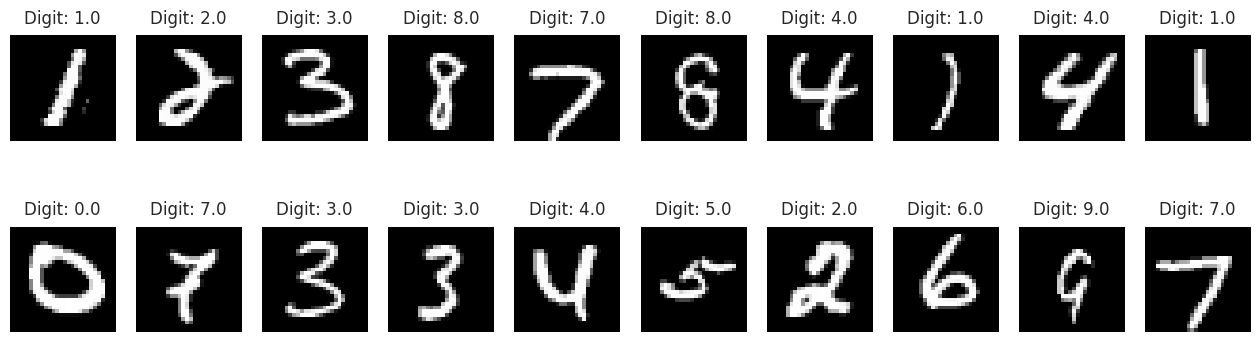

In [41]:
def plotMNIST(df, feat_cols=df.columns[:784].values, maxN=20, print_digits=True):
        # plot pixels
    plt.gray()
    fig = plt.figure( figsize=(16,7) )
    for i in range(0,maxN):
        if print_digits:
            ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[i,'label']) )
        else:
            ax = fig.add_subplot(3,10,i+1)
        
        ax.matshow(df.loc[i,feat_cols].values.reshape((28,28)).astype(float))
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    plt.show()


plotMNIST(df,print_digits=True)

<h2>Implementating a Principal Component Analysis (PCA) requires five computation steps</h2>
<ol>
<li>Compute the $d$-dimensional mean vector</li>
<li>Compute the covariance matrix $\Sigma$ </li>
<li>Compute eigenvetors $w$ and eigenvalues $\lambda$ of the following eigenwert problem: $\Sigma \ w = \lambda \ w$ </li>
<li>Sort the eigenvectors and eigenvalues by decreasing eigenvalues</li>
<li>Transform the original data set onto the new supbspace:  $ X_{trans} = W^T \ X$  eigenvector to tra   the eigenvectors and eigenvalues by decreasing eigenvalues</li>
</ol>

In [72]:
def myPCA(X, maxPCs=2):
    m, n = X.shape 
    # step 1
    X -= X.mean(axis=0)
    # step 2
    Sigma = np.dot(X.T,X)/m
    # step 3
    evals, W = np.linalg.eigh(Sigma)
    # step 4
    idx = np.argsort(evals)[::-1]
    evals = evals[idx[:maxPCs]]
    W = W[:,idx[:maxPCs]]
    # step 5
    return np.dot(W.T,X.T).T, evals, W
    

In [142]:
proj, evals, W = myPCA(df[feat_cols].values,784)

df_W = pd.DataFrame(W.T,columns=feat_cols)

df['comp-one'] = proj[:,0]
df['comp-two'] = proj[:,1] 
df['comp-three'] = proj[:,2]

<h2>Take a look at the eigenvalues</h2>

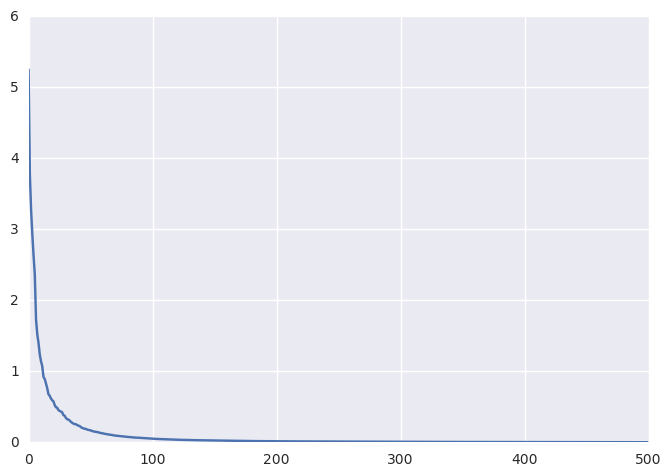

In [102]:
plt.plot(evals)

<h2>Take a look at the eigendigits</h2>

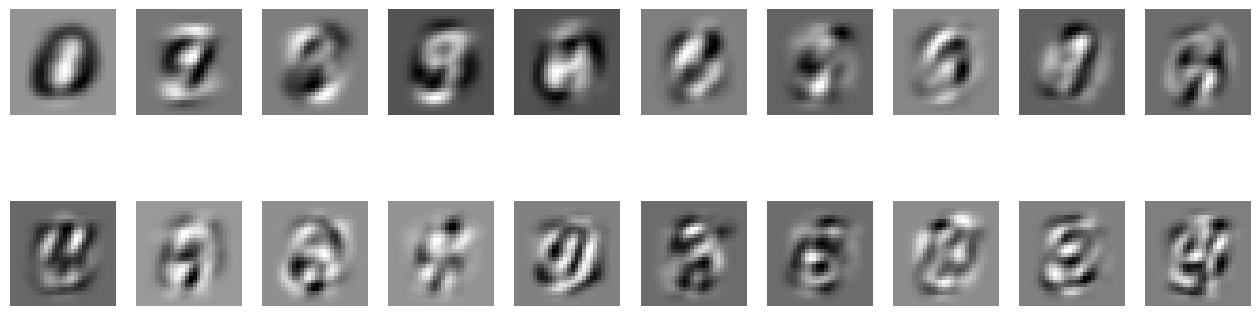

In [99]:
plotMNIST(df_W,  maxN=20, print_digits=False)

<h2>Take a look at the reconstruction</h2>

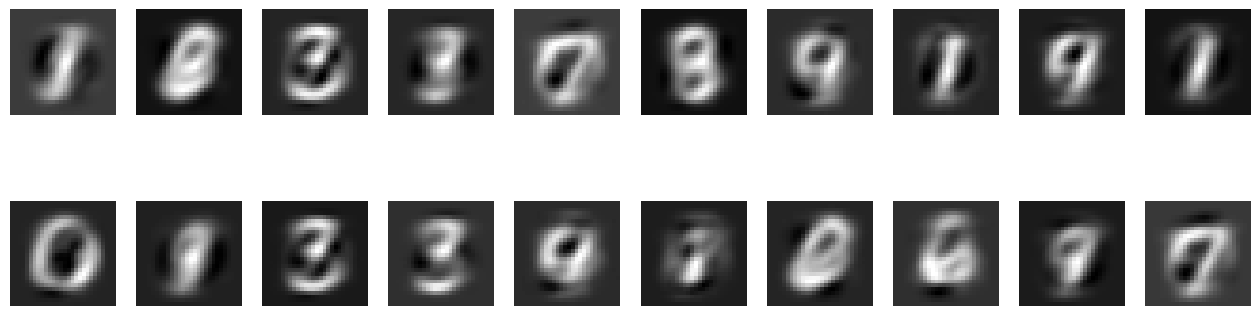

In [149]:
recons = np.dot(proj[:,:5],W[:,:5].T) + df[feat_cols].values.mean(axis=0)
df_recons = pd.DataFrame(recons,columns=feat_cols)
plotMNIST(df_recons,  maxN=20, print_digits=False)


<h2>Ploting the reconstruction error over the number used PCs</h2>

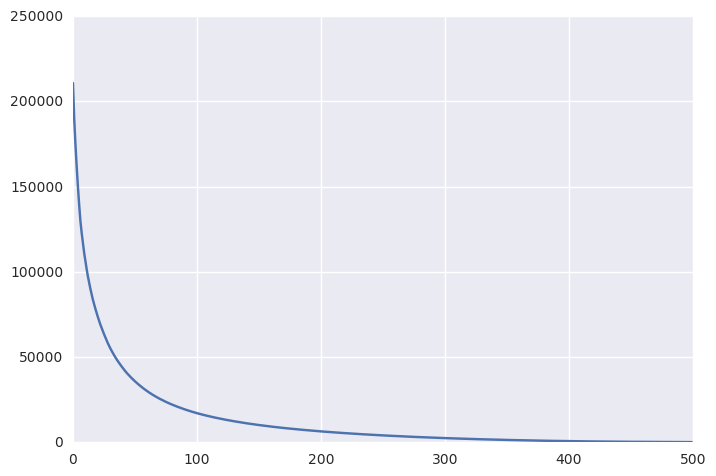

In [114]:
rse = [np.sum((df[feat_cols].values - (np.dot(proj[:,:i],W[:,:i].T) + df[feat_cols].values.mean(axis=0)))**2) for i in range(500) ]
plt.plot(rse)

<h2>Pairwise scatterplot of the PCs</h2>

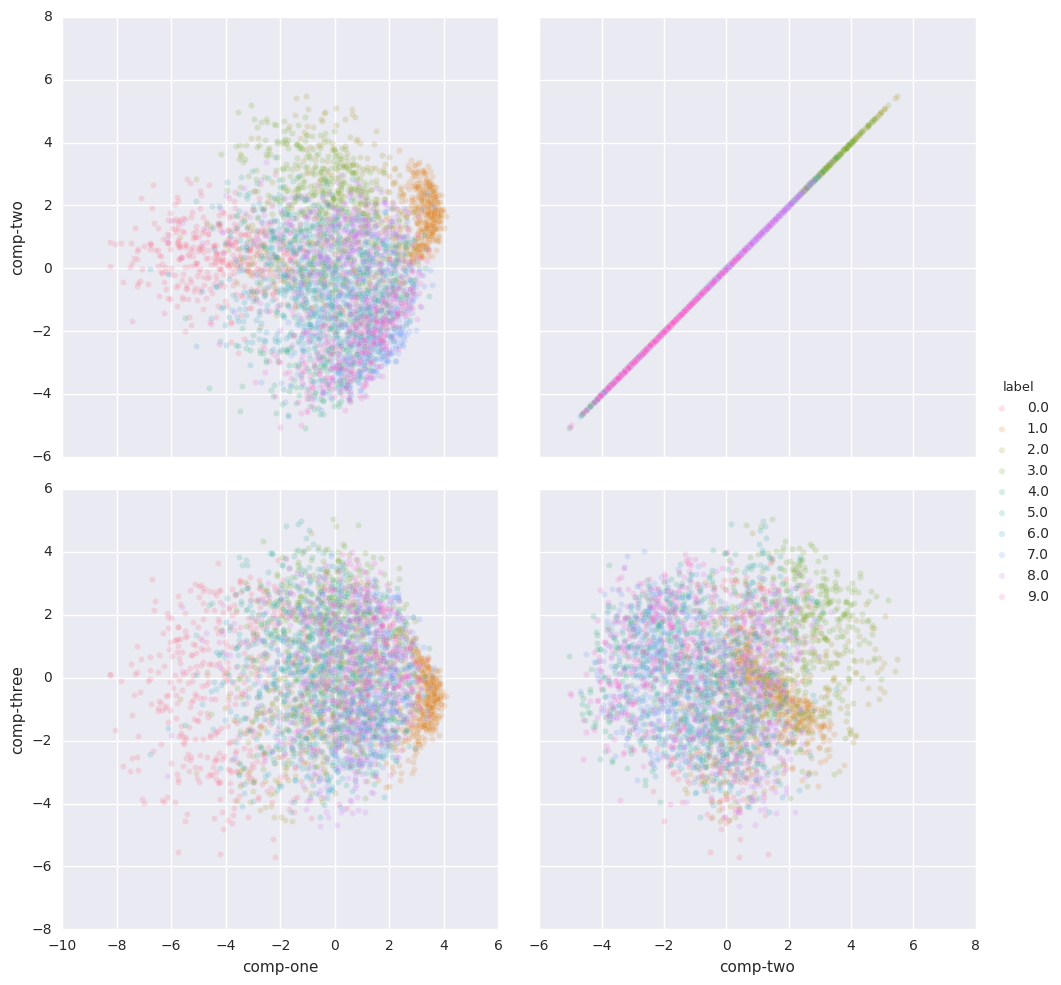

In [123]:
sns.set()
sns.pairplot(df, hue="label", x_vars=["comp-one","comp-two"], y_vars=["comp-two","comp-three"], plot_kws={"alpha": 0.2},  size=5,)

<h2>Now, let's use scikit.learn's PCA </h3>

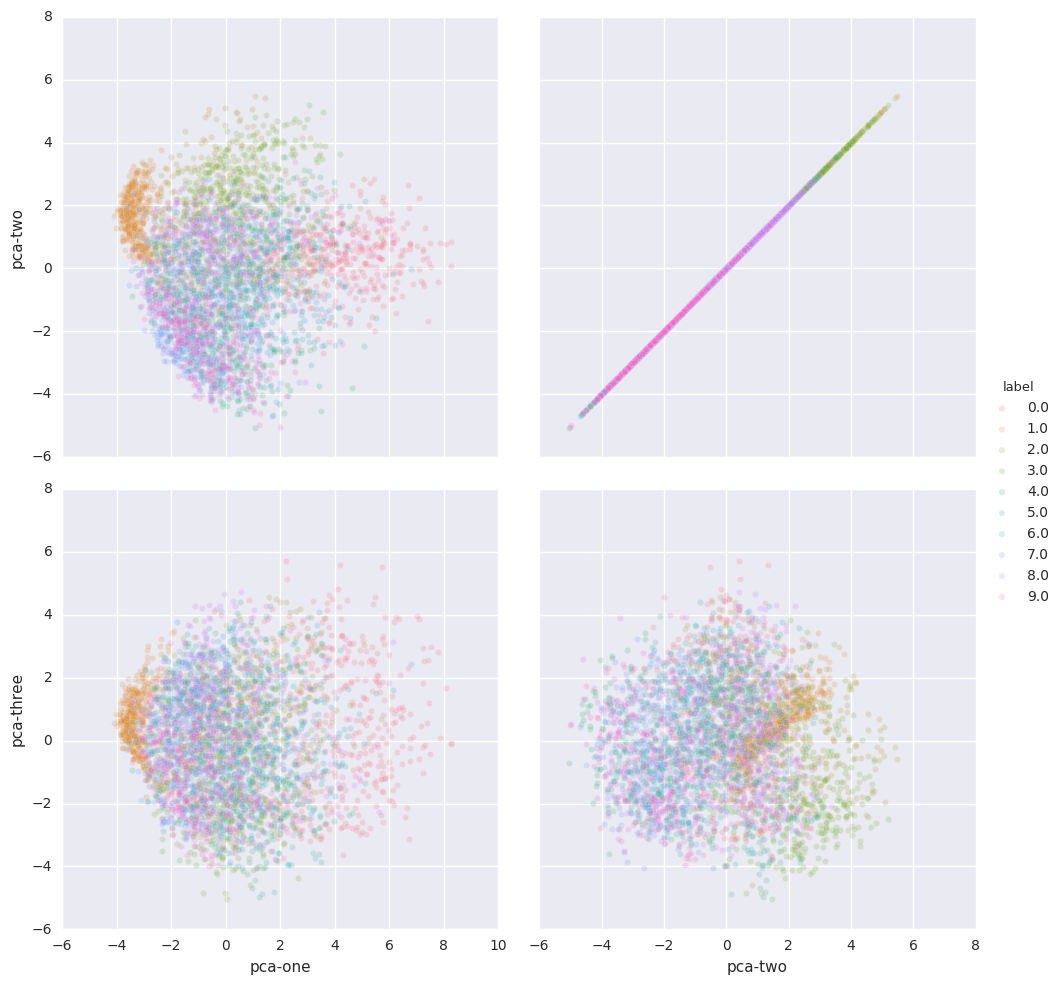

In [125]:

pca = repres.PCA(n_components=784)
res = pca.fit_transform(df[feat_cols].values)


df['pca-one'] = res[:,0]
df['pca-two'] = res[:,1] 
df['pca-three'] = res[:,2]

sns.pairplot(df, hue="label", x_vars=["pca-one","pca-two"], y_vars=["pca-two","pca-three"], plot_kws={"alpha": 0.2},  size=5,)

<h2>Now, let's use scikit.learn's Factor Analysis</h3>

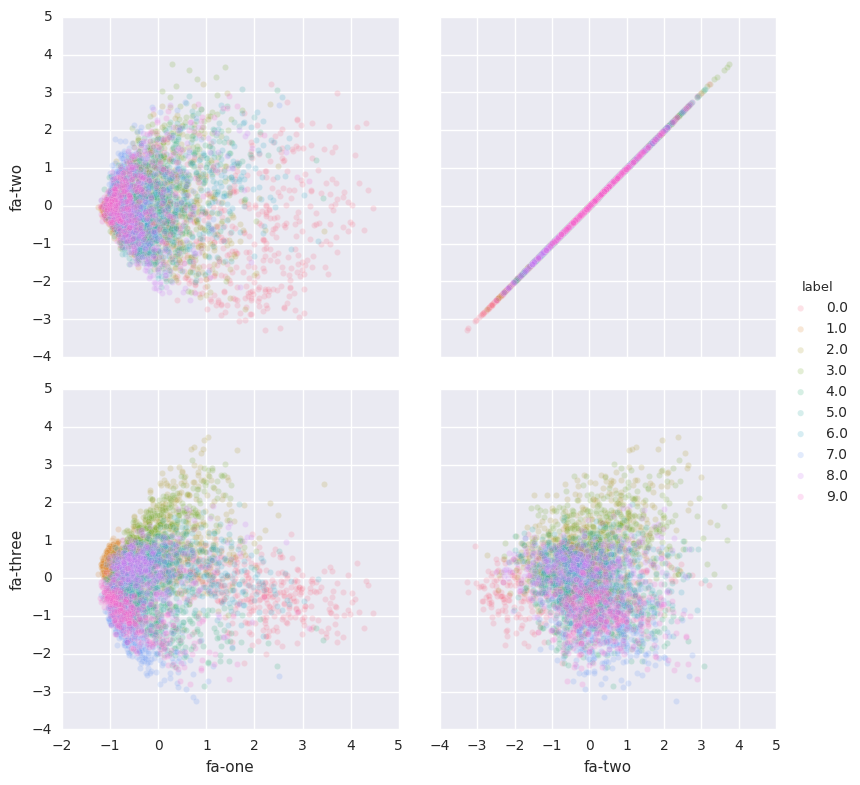

In [147]:
pca = repres.FactorAnalysis(n_components=3)
res = pca.fit_transform(df[feat_cols].values)


df['fa-one'] = res[:,0]
df['fa-two'] = res[:,1] 
df['fa-three'] = res[:,2]

sns.pairplot(df, hue="label", x_vars=["fa-one","fa-two"], y_vars=["fa-two","fa-three"], plot_kws={"alpha": 0.2},  size=4,)

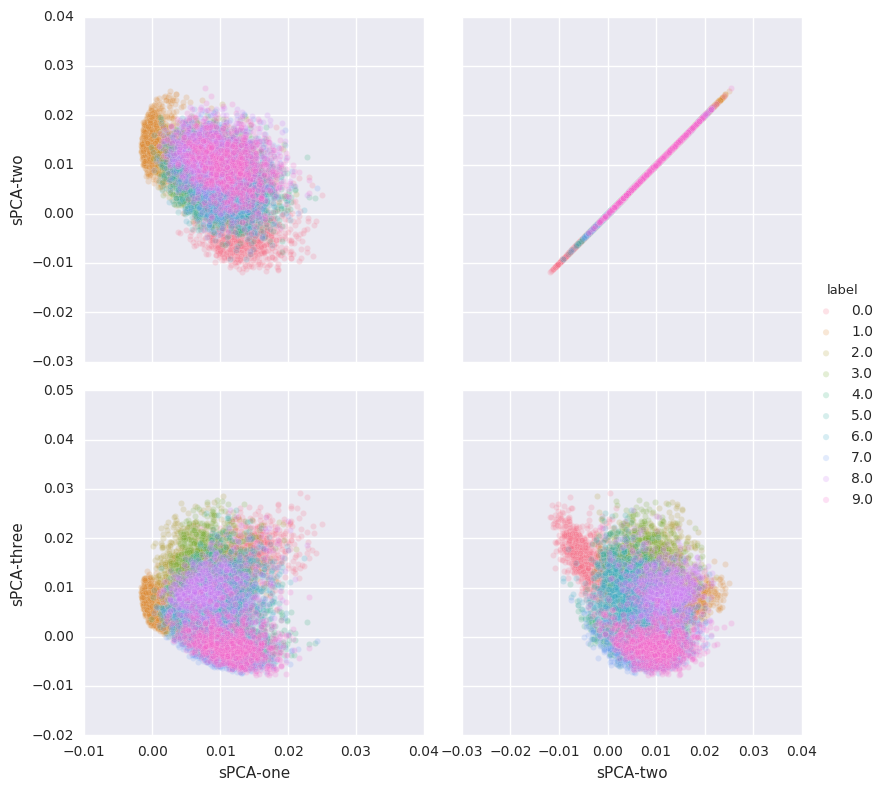

In [9]:
pca = repres.MiniBatchSparsePCA(n_components=3,batch_size=100,n_iter=1000,ridge_alpha=0.1)
res = pca.fit_transform(df[feat_cols].values)

df['sPCA-one'] = res[:,0]
df['sPCA-two'] = res[:,1] 
df['sPCA-three'] = res[:,2]

sns.pairplot(df, hue="label", x_vars=["sPCA-one","sPCA-two"], y_vars=["sPCA-two","sPCA-three"], plot_kws={"alpha": 0.2},  size=4,)

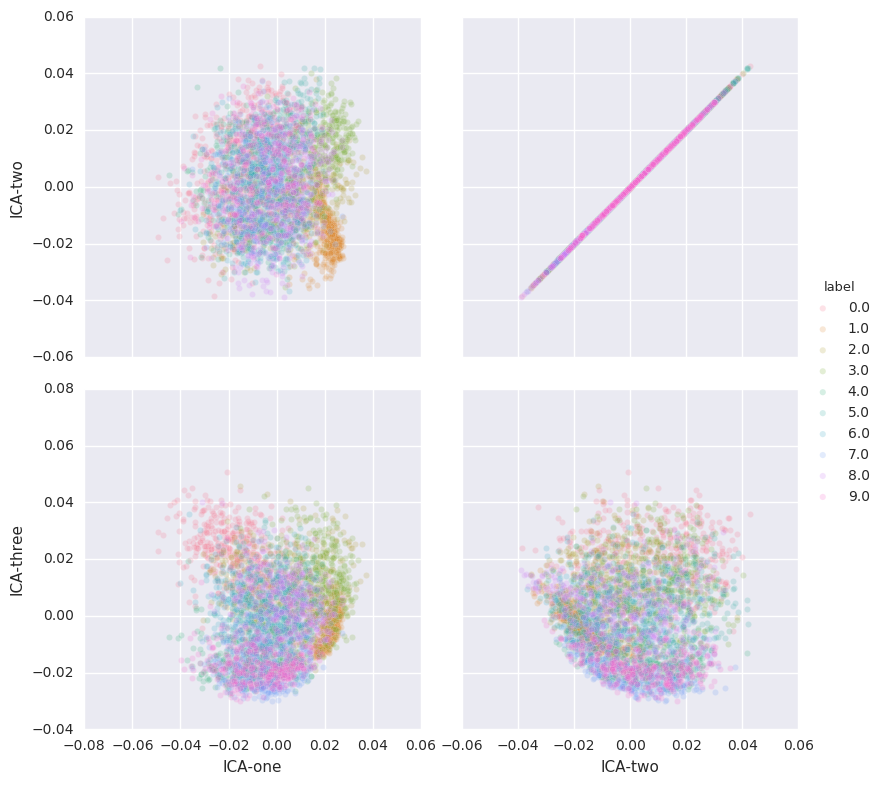

In [148]:
pca = repres.FastICA(n_components=3)
res = pca.fit_transform(df[feat_cols].values)

df['ICA-one'] = res[:,0]
df['ICA-two'] = res[:,1] 
df['ICA-three'] = res[:,2]

sns.pairplot(df, hue="label", x_vars=["ICA-one","ICA-two"], y_vars=["ICA-two","ICA-three"], plot_kws={"alpha": 0.2},  size=4,)